## Importing and normalization of dataset

In [4]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from numpy import array
from numpy import argmax
from sklearn.model_selection import train_test_split

data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


From the info method we can see that five of the features are represented by object datatypes, which means that we need to 

In [113]:
enc = preprocessing.OrdinalEncoder()
data[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]] = enc.fit_transform(data[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [152]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

df = pd.get_dummies(data, columns = categorical_cols)

min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
data_scaled = min_max_scaler.fit_transform(df)


#data_scaled[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']] = standard_scaler.fit_transform(df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']])

data_scaled = pd.DataFrame(data_scaled, columns=df.columns)



data_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_0.0,Sex_1.0,ChestPainType_0.0,...,ChestPainType_2.0,ChestPainType_3.0,RestingECG_0.0,RestingECG_1.0,RestingECG_2.0,ExerciseAngina_0.0,ExerciseAngina_1.0,ST_Slope_0.0,ST_Slope_1.0,ST_Slope_2.0
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Creation of training and testing datasets

In [151]:
from keras.utils import to_categorical

X = np.array(data_scaled.drop(['HeartDisease'], 1))
y = np.array(data_scaled['HeartDisease'])

X_train_full, X_test, y_train_full, y_test  = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid  = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.2, random_state=42)

y_train_binary = y_train.copy()
y_test_binary = y_test.copy()
y_valid_binary = y_valid.copy()

y_train_binary[y_train_binary > 0 ] = 1
y_test_binary[y_test_binary > 0 ] = 1
y_valid_binary[y_valid_binary > 0 ] = 1

X_train.shape

(587, 20)

## Creation of NN model

In [150]:
from keras import models
from keras import layers
from keras import regularizers
from keras.optimizers import Adam

def create_binary_model(units, n_layers):
    # create model
    model = models.Sequential()
    model.add(layers.Dense(units, input_dim=20, kernel_initializer='he_uniform',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    #model.add(layers.Dropout(0.25))
    
    for l in range(n_layers):
        model.add(layers.Dense(units, kernel_initializer='he_uniform',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
        #model.add(layers.Dropout(0.25))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model(8, 1)

binary_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_414 (Dense)            (None, 8)                 168       
_________________________________________________________________
dense_415 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_416 (Dense)            (None, 1)                 9         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


## Binary classification

In [153]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

binary_history=binary_model.fit(X_train, y_train_binary, validation_data=(X_valid, y_valid_binary), epochs=2000, batch_size=30, verbose=0, shuffle=True, callbacks=[es])

Epoch 00268: early stopping


In [154]:
score=binary_model.evaluate(X_test, y_test_binary)

_, train_acc = binary_model.evaluate(X_train, y_train_binary, verbose=0)
_, test_acc = binary_model.evaluate(X_test, y_test_binary, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

6/6 [==============================] - 0s 666us/step - loss: 0.3991 - accuracy: 0.8533
Train: 0.881, Test: 0.853


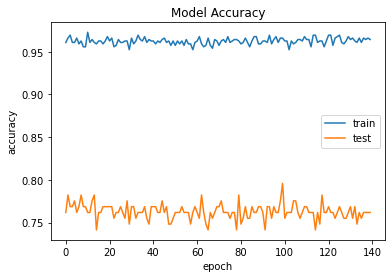

In [148]:
import matplotlib.pyplot as plt

plt.plot(binary_history.history['accuracy'])
plt.plot(binary_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

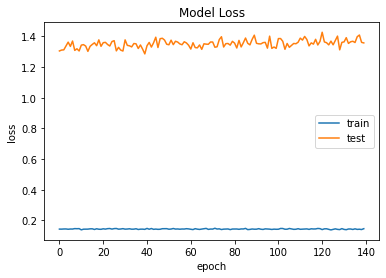

In [149]:
plt.plot(binary_history.history['loss'])
plt.plot(binary_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for binary model')
print(accuracy_score(y_test_binary, binary_pred))
print(classification_report(y_test_binary, binary_pred))

Results for binary model
0.8586956521739131
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84        82
         1.0       0.86      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



## Improving model using GridSearchCV

In [7]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = create_binary_model)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32],
              'epochs': [100, 150],
              'units': [100, 200, 300, 400, 500],
             'n_layers':[1, 2, 3, 4, 5]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5,
                           verbose = 2)
grid_search = grid_search.fit(X_train, y_train_binary, verbose = 0)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=100; total time=   2.9s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=100; total time=   2.8s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=100; total time=   2.8s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=100; total time=   2.8s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=100; total time=   2.9s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=200; total time=   3.5s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=200; total time=   3.8s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=200; total time=   3.8s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=200; total time=   4.0s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=200; total time=   5.0s
[CV] END ...batch_size=16, epochs=100, n_layers=1, units=300; total time=   5.8s
[CV] END ...batch_size=16, epochs=100, n_layer

[CV] END ...batch_size=16, epochs=100, n_layers=5, units=100; total time=   5.6s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=100; total time=   5.5s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=100; total time=   5.3s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=100; total time=   5.3s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=200; total time=   8.7s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=200; total time=   9.2s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=200; total time=   8.9s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=200; total time=   8.7s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=200; total time=   9.2s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=300; total time=  14.4s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=300; total time=  14.2s
[CV] END ...batch_size=16, epochs=100, n_layers=5, units=300; total time=  14.7s
[CV] END ...batch_size=16, e

[CV] END ...batch_size=16, epochs=150, n_layers=4, units=100; total time=   7.8s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=100; total time=   7.6s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=200; total time=  12.1s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=200; total time=  11.8s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=200; total time=  12.8s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=200; total time=  11.3s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=200; total time=  11.9s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=300; total time=  19.2s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=300; total time=  19.0s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=300; total time=  18.5s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=300; total time=  18.1s
[CV] END ...batch_size=16, epochs=150, n_layers=4, units=300; total time=  18.8s
[CV] END ...batch_size=16, e

[CV] END ...batch_size=32, epochs=100, n_layers=3, units=200; total time=   5.9s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=200; total time=   5.8s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=200; total time=   5.7s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=200; total time=   6.0s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=200; total time=   5.7s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=300; total time=   8.3s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=300; total time=   8.1s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=300; total time=   9.4s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=300; total time=   8.7s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=300; total time=   8.7s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=400; total time=  11.1s
[CV] END ...batch_size=32, epochs=100, n_layers=3, units=400; total time=  11.7s
[CV] END ...batch_size=32, e

[CV] END ...batch_size=32, epochs=150, n_layers=2, units=200; total time=   6.4s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=200; total time=   6.4s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=200; total time=   6.8s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=300; total time=   9.6s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=300; total time=  11.4s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=300; total time=   9.9s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=300; total time=   9.9s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=300; total time=  10.0s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=400; total time=  13.2s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=400; total time=  12.9s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=400; total time=  13.0s
[CV] END ...batch_size=32, epochs=150, n_layers=2, units=400; total time=  12.9s
[CV] END ...batch_size=32, e

In [9]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters: " + str(best_parameters))
print("Best score: " + str(best_score))

Best parameters: {'batch_size': 32, 'epochs': 150, 'n_layers': 5, 'units': 200}
Best score: -0.17366801371529386
